<a href="https://colab.research.google.com/github/HindFaris/urban_security/blob/chomage_police_analysis/Crime_Chomage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding

Import librairies


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load data

In [ ]:
file_path = 'full_dataset_normalized_2.csv'
data = pd.read_csv(file_path)

<ipython-input-19-5f8b298d359c>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [ ]:
data.head()

,Date,code_dep,Homicides,Vols,Cambriolages à domicile ou violaiton de domicile,Crimes ou délits sexuelles,Infractions liées aux stupéfiants,Dégradations ou destructions de biens volontaires,Violences,Falsifications et contrefaçons,...,Crimes ou délits sexuelles_per_population,Infractions liées aux stupéfiants_per_population,Dégradations ou destructions de biens volontaires_per_population,Violences_per_population,Falsifications et contrefaçons_per_population,Délits Économiques et Financiers_per_population,Irégularités de Main-d'oeuvre_per_population,effectif_total_police_national_per_population,Chomage_per_population,density
0,2020-12-31,France_Métro,334,100149,19220,6233,15373,18688,30279,39799,...,0.000095,0.000236,0.000286,0.000464,0.000610,0.000020,0.000013,NaN,0.093126,101.380945
1,2020-11-30,France_Métro,287,86852,12762,6559,21340,18284,31860,39160,...,0.000100,0.000327,0.000280,0.000488,0.000600,0.000025,0.000016,NaN,0.093189,101.380945
2,2020-10-31,France_Métro,308,117119,20116,6406,21422,20370,32536,39578,...,0.000098,0.000328,0.000312,0.000498,0.000606,0.000027,0.000015,NaN,0.093251,101.380945
3,2020-09-30,France_Métro,343,125419,19515,6814,19659,21363,35031,39789,...,0.000104,0.000301,0.000327,0.000537,0.000610,0.000022,0.000016,NaN,0.093313,101.380945
4,2020-08-31,France_Métro,329,123620,20889,6327,12379,21848,33364,38851,...,0.000097,0.000190,0.000335,0.000511,0.000595,0.000017,0.000010,NaN,0.092824,101.380945


In [ ]:
# Caster le code dep en string
data['code_dep'] = data['code_dep'].astype(str)

Choix des colonnes a traiter

In [ ]:
column_names = data.columns
print(column_names)


Index(['Date', 'code_dep', 'Homicides', 'Vols',
       'Cambriolages à domicile ou violaiton de domicile',
       'Crimes ou délits sexuelles', 'Infractions liées aux stupéfiants',
       'Dégradations ou destructions de biens volontaires', 'Violences',
       'Falsifications et contrefaçons', 'Délits Économiques et Financiers',
       'Irégularités de Main-d'oeuvre', 'annee', 'Population', 'Chomage',
       'Taux de pauvreté-moins de 30', 'Taux de pauvreté-30 à 39 ans',
       'Taux de pauvreté-40 à 49 ans', 'Taux de pauvreté-50 à 59 ans',
       'Taux de pauvreté-60 à 74 ans', 'Taux de pauvreté-75 ans ou plus',
       'Median_salaire', 'Taux de pauvreté-Ensemble', 'Bac_g_réussite_%',
       'Bac_t_réussite_%', 'Bac_p_réussite_%', 'Bac_g_%', 'Bac_t_%', 'Bac_p_%',
       'non_peu_diplômés_non_scolarisée_<15ans', 'Superficie\r\n(km2)',
       'effectif_total_police_national', 'Homicides_per_population',
       'Vols_per_population',
       'Cambriolages à domicile ou violaiton de domici

In [ ]:
#les données brutes
df = data[['Date', 'annee', 'code_dep',
                      'Chomage',  'effectif_total_police_national',
                      'Homicides', 'Vols',
                      'Cambriolages à domicile ou violaiton de domicile',
                      'Crimes ou délits sexuelles', 'Infractions liées aux stupéfiants',
                      'Dégradations ou destructions de biens volontaires', 'Violences',
                      'Falsifications et contrefaçons', 'Délits Économiques et Financiers',
                      'Irégularités de Main-d\'oeuvre']]


In [ ]:
# Crimes et delits
crimes_delits = [ 'Homicides', 'Vols',
                      'Cambriolages à domicile ou violaiton de domicile',
                      'Crimes ou délits sexuelles', 'Infractions liées aux stupéfiants',
                      'Dégradations ou destructions de biens volontaires', 'Violences',
                      'Falsifications et contrefaçons', 'Délits Économiques et Financiers',
                      'Irégularités de Main-d\'oeuvre']

In [ ]:
df['Total_Delinquance'] = df[crimes_delits].sum(axis=1)


<ipython-input-25-a5b35a99e01c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Delinquance'] = df[crimes_delits].sum(axis=1)


Vu que les variables de l'ensemble de données présentent des ordres de grandeur distincts, nous utiliserons les données normalisées. Nous focaliserons notre analyse sur les crimes, le taux de chômage et la présence policière.


In [ ]:
#les données normalisées
df_normalized = data[['Date', 'annee', 'code_dep', 'density',
       'Homicides_per_population',
       'Vols_per_population',
       'Cambriolages à domicile ou violaiton de domicile_per_population',
       'Crimes ou délits sexuelles_per_population',
       'Infractions liées aux stupéfiants_per_population',
       'Dégradations ou destructions de biens volontaires_per_population',
       'Violences_per_population',
       'Falsifications et contrefaçons_per_population',
       'Délits Économiques et Financiers_per_population',
       'Irégularités de Main-d\'oeuvre_per_population',
       'effectif_total_police_national_per_population',
       'Chomage_per_population']]

In [ ]:
# Crimes et delits normalisee
crimes_delits_normalized = ['Homicides_per_population',
       'Vols_per_population',
       'Cambriolages à domicile ou violaiton de domicile_per_population',
       'Crimes ou délits sexuelles_per_population',
       'Infractions liées aux stupéfiants_per_population',
       'Dégradations ou destructions de biens volontaires_per_population',
       'Violences_per_population',
       'Falsifications et contrefaçons_per_population',
       'Délits Économiques et Financiers_per_population',
       'Irégularités de Main-d\'oeuvre_per_population']

#calcule la somme des valeurs dans chaque ligne pour les colonnes spécifiées dans crimes_delits.
df_normalized['Total_Delinquance_per_population'] = df_normalized[crimes_delits_normalized].sum(axis=1)


<ipython-input-27-91d3568e6d38>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalized['Total_Delinquance_per_population'] = df_normalized[crimes_delits_normalized].sum(axis=1)


In [ ]:
print("La taille de la dataframe:", df_normalized.shape)

La taille de la dataframe: (26328, 17)


In [ ]:
 df_normalized

,Date,annee,code_dep,density,Homicides_per_population,Vols_per_population,Cambriolages à domicile ou violaiton de domicile_per_population,Crimes ou délits sexuelles_per_population,Infractions liées aux stupéfiants_per_population,Dégradations ou destructions de biens volontaires_per_population,Violences_per_population,Falsifications et contrefaçons_per_population,Délits Économiques et Financiers_per_population,Irégularités de Main-d'oeuvre_per_population,effectif_total_police_national_per_population,Chomage_per_population,Total_Delinquance_per_population
0,2020-12-31,2020,France_Métro,101.380945,0.000005,0.001534,0.000294,0.000095,0.000236,0.000286,0.000464,0.000610,0.000020,0.000013,NaN,0.093126,0.003558
1,2020-11-30,2020,France_Métro,101.380945,0.000004,0.001331,0.000196,0.000100,0.000327,0.000280,0.000488,0.000600,0.000025,0.000016,NaN,0.093189,0.003367
2,2020-10-31,2020,France_Métro,101.380945,0.000005,0.001794,0.000308,0.000098,0.000328,0.000312,0.000498,0.000606,0.000027,0.000015,NaN,0.093251,0.003993
3,2020-09-30,2020,France_Métro,101.380945,0.000005,0.001922,0.000299,0.000104,0.000301,0.000327,0.000537,0.000610,0.000022,0.000016,NaN,0.093313,0.004143
4,2020-08-31,2020,France_Métro,101.380945,0.000005,0.001894,0.000320,0.000097,0.000190,0.000335,0.000511,0.000595,0.000017,0.000010,NaN,0.092824,0.003974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26323,2006-05-31,2006,974,312.322563,0.000006,0.001637,0.000256,0.000065,0.000096,0.000269,0.000307,0.000396,0.000006,0.000008,NaN,0.116430,0.003046
26324,2006-04-30,2006,974,312.322563,0.000009,0.001666,0.000244,0.000047,0.000127,0.000275,0.000307,0.000155,0.000005,0.000022,NaN,0.118756,0.002857
26325,2006-03-31,2006,974,312.322563,0.000008,0.001922,0.000215,0.000068,0.000113,0.000269,0.000382,0.000156,0.000006,0.000014,NaN,0.121131,0.003152
26326,2006-02-28,2006,974,312.322563,0.000001,0.001703,0.000293,0.000050,0.000109,0.000244,0.000303,0.000116,0.000003,0.000019,NaN,0.121131,0.002842


# Chômage

**Analyse Temporelle**

<ipython-input-30-61ce634ae50d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chomage_date['Date'] = pd.to_datetime(df_chomage_date['Date'])
<ipython-input-30-61ce634ae50d>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Chomage_per_population', data=df_chomage_date, ci=None, linestyle='-', color='b')
<ipython-input-30-61ce634ae50d>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:g}'.format(x*10) for x in plt.gca().get_yticks()])


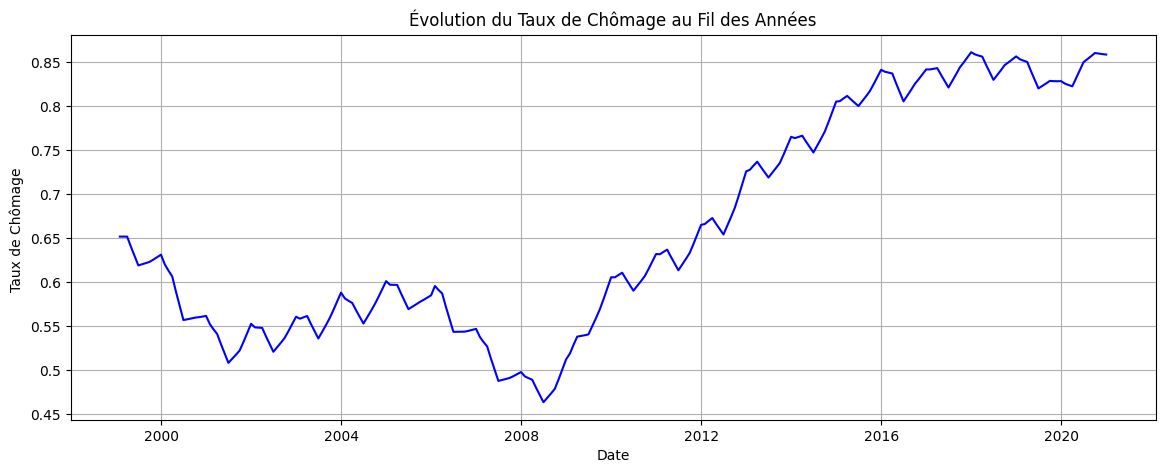

In [ ]:
# Extract relevant columns and convert 'Date' to datetime
df_chomage_date = df_normalized[['Date', 'Chomage_per_population']]
df_chomage_date['Date'] = pd.to_datetime(df_chomage_date['Date'])

# Plotting the evolution of the unemployment rate per mille as a line
plt.figure(figsize=(14, 5))
sns.lineplot(x='Date', y='Chomage_per_population', data=df_chomage_date, ci=None, linestyle='-', color='b')

# Customize the y-axis
plt.gca().set_yticklabels(['{:g}'.format(x*10) for x in plt.gca().get_yticks()])

# Customize the plot
plt.title('Évolution du Taux de Chômage au Fil des Années')
plt.xlabel('Date')
plt.ylabel('Taux de Chômage ')
plt.grid(True)
plt.show()


Le taux de chômage en France a connu une augmentation importante entre 2008 et 2020. Cette augmentation est due à plusieurs facteurs, dont la crise financière mondiale de 2008, la crise de la zone euro et la pandémie de COVID-19.




**Corrélation entre le taux de chômage, effectif de polilce et chaque type de crime**




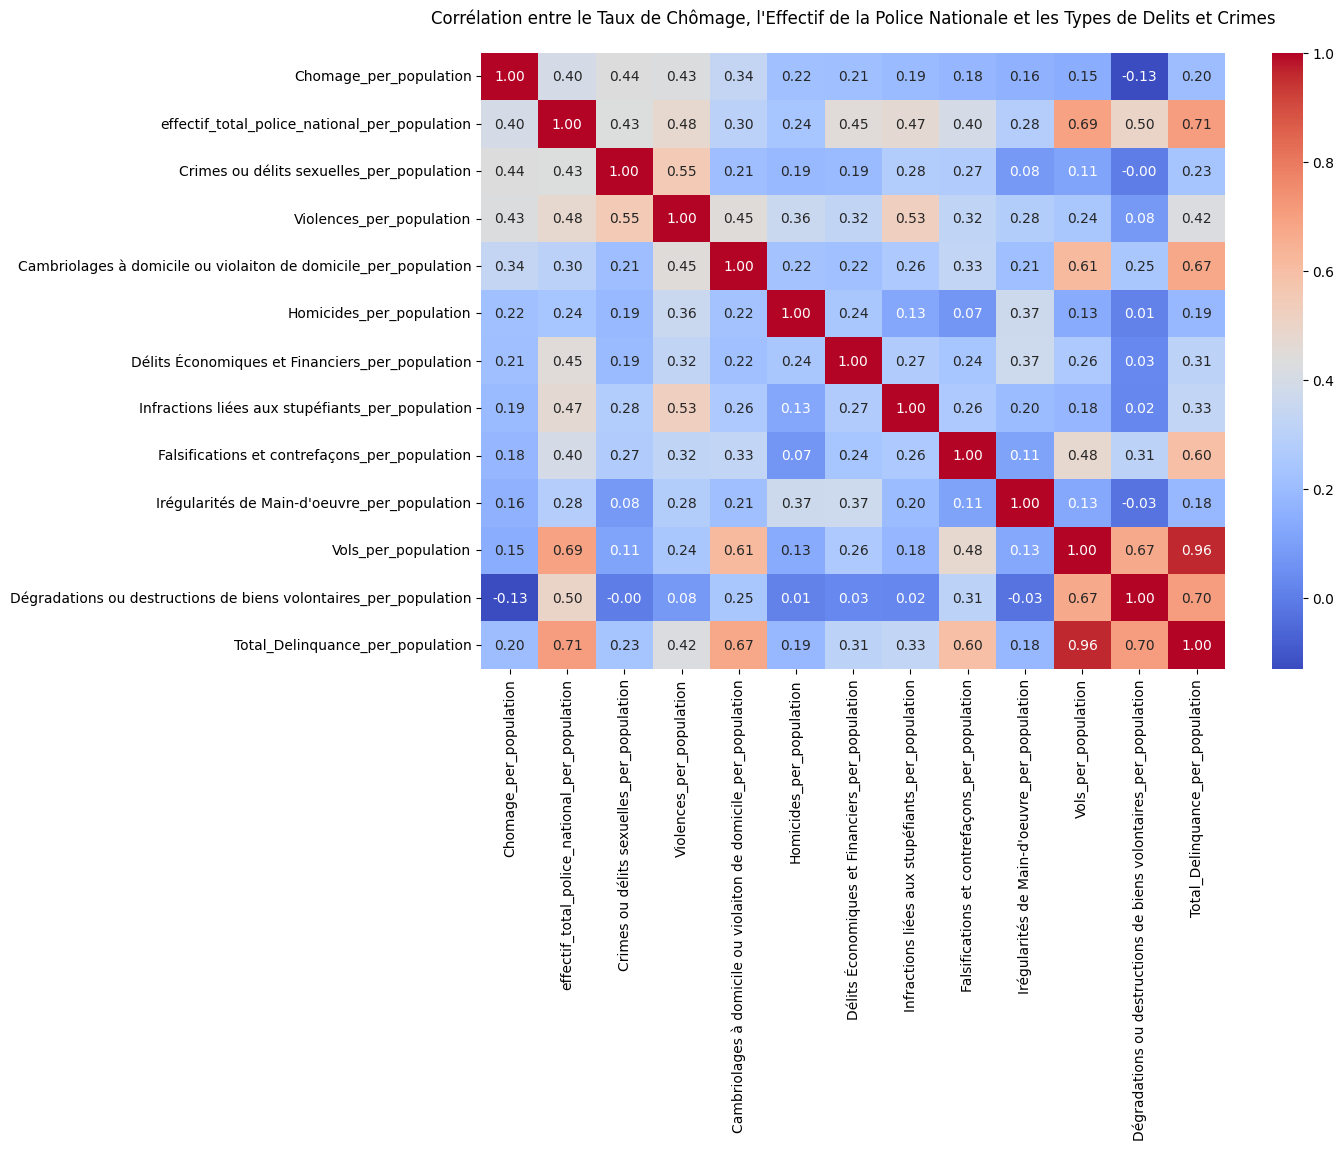

In [ ]:
cols_to_plot = [
    'Chomage_per_population',
    'effectif_total_police_national_per_population',
    'Crimes ou délits sexuelles_per_population',
    'Violences_per_population',
    'Cambriolages à domicile ou violaiton de domicile_per_population',
    'Homicides_per_population',
    'Délits Économiques et Financiers_per_population',
    'Infractions liées aux stupéfiants_per_population',
    'Falsifications et contrefaçons_per_population',
    'Irégularités de Main-d\'oeuvre_per_population',
    'Vols_per_population',
    'Dégradations ou destructions de biens volontaires_per_population',
    'Total_Delinquance_per_population'
]

# Assuming df_normalized is your DataFrame
correlation_matrix = df_normalized[cols_to_plot].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Customize the plot with a meaningful title
plt.title('Corrélation entre le Taux de Chômage, l\'Effectif de la Police Nationale et les Types de Delits et Crimes\n')
plt.show()



*Chômage et délinquance*: Il y a une correlation positive entre le taux de chômage et la plupart des types de délinquance

*Effectif de la police nationale et délinquance*: Plus la police est présente, plus la délinquance semble augmenter

Conclusions:

*   Réduire le chômage pourrait réduire la délinquance.
*   Augmenter la police peut aider


**Analyse géographique**




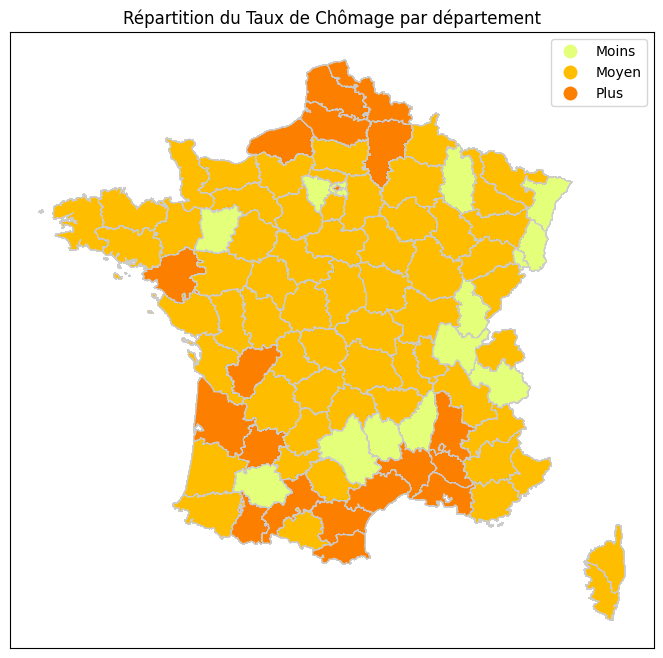

In [ ]:
import geopandas as gpd

# Load GeoDataFrame from GeoJSON file
gdf = gpd.read_file('departements.geojson')

# Merge gdf with df_normalized on the department code
merged_df = gdf.merge(df_normalized, left_on='code', right_on='code_dep')

# Calculate quartiles to define categories for unemployment rate
q25_chomage = merged_df['Chomage_per_population'].quantile(0.25)
q75_chomage = merged_df['Chomage_per_population'].quantile(0.75)

# Categorize departments based on quartiles for unemployment rate
merged_df['chomage_category'] = pd.cut(
    merged_df['Chomage_per_population'],
    bins=[-float('inf'), q25_chomage, q75_chomage, float('inf')],
    labels=['Moins', 'Moyen', 'Plus']
)


# Set up the figure and axis for the map
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the choropleth map for unemployment rate
#YlGnBu these colors are better
merged_df.plot(column='chomage_category', ax=ax, legend=True, cmap='Wistia', linewidth=0.8, edgecolor='0.8')

# Remove x and y axis labels and tick values
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Add title and show the map
plt.title('Répartition du Taux de Chômage par département')
plt.show()


In [ ]:
# Assuming df_normalized is your DataFrame
selected_departments = ['12', '93', '34', '75', '15', '13', '43', '95', '06', '23']

# Filter the DataFrame to include only selected departments
selected_data = df_normalized[df_normalized['code_dep'].astype(str).isin(selected_departments)]

# Group by 'code_dep' to calculate the mean for each department
average_data = selected_data.groupby('code_dep')[['Total_Delinquance_per_population', 'Chomage_per_population']].mean().reset_index()

# Calculate quartiles to define categories for unemployment rate
q25_chomage = average_data['Chomage_per_population'].quantile(0.25)
q75_chomage = average_data['Chomage_per_population'].quantile(0.75)

# Categorize departments based on quartiles for unemployment rate
average_data['chomage_category'] = pd.cut(
    average_data['Chomage_per_population'],
    bins=[-float('inf'), q25_chomage, q75_chomage, float('inf')],
    labels=['Moins', 'Moyen', 'Plus']
)

# Créer une palette 'Wistia' pour les catégories
wistia_palette = sns.color_palette("Wistia", n_colors=len(average_data['chomage_category'].unique()))



<ipython-input-34-0c918f10557f>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_yticklabels(['{:,.0f}‰'.format(x * 1000) for x in barplot.get_yticks()])


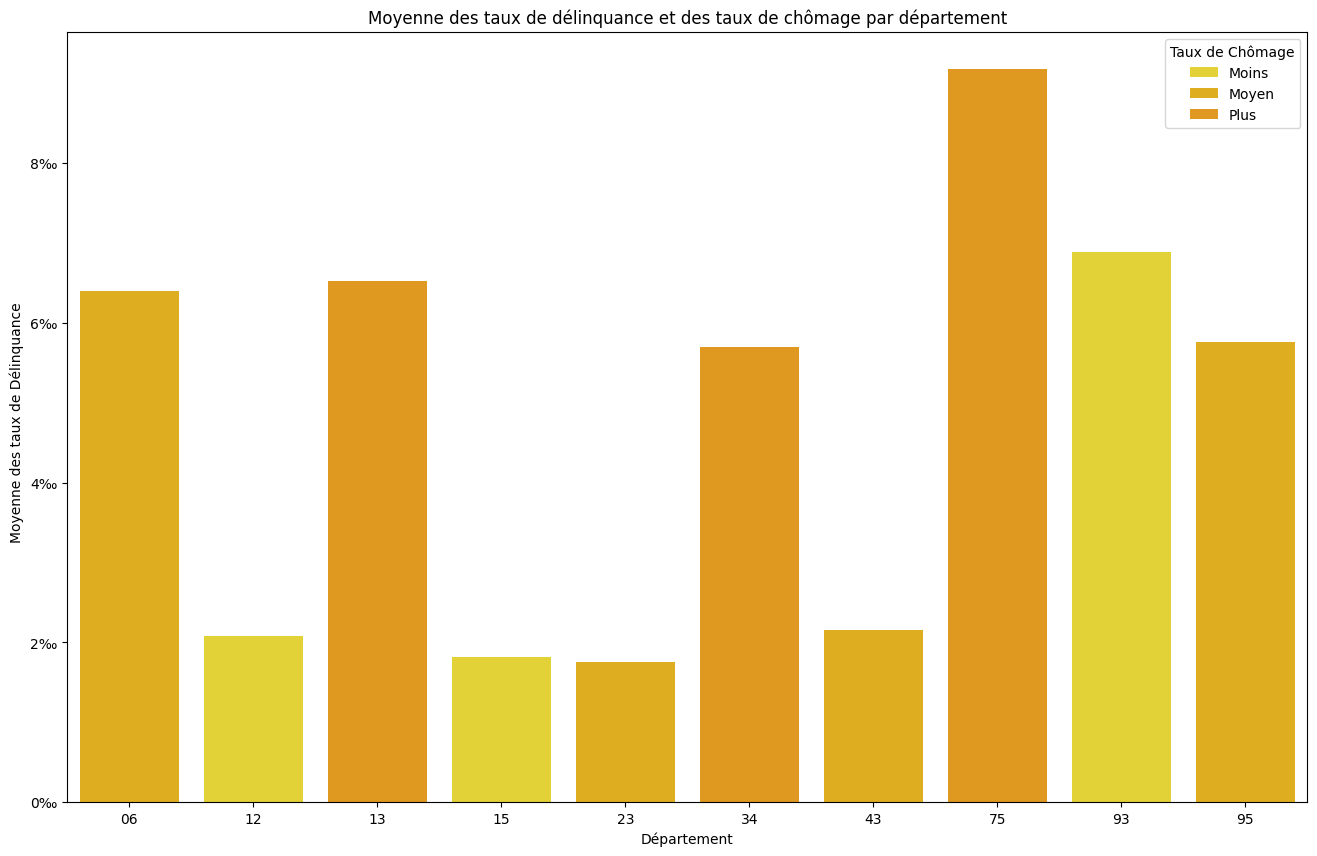

In [ ]:
# Tracer le graphique à barres
plt.figure(figsize=(16, 10))
barplot = sns.barplot(x='code_dep', y='Total_Delinquance_per_population', data=average_data, hue='chomage_category', palette=wistia_palette)

# Multiply y-axis values by 1000 and set y-axis format to per mille
barplot.set(ylabel='Moyenne des taux de Délinquance  ')
barplot.set_yticklabels(['{:,.0f}‰'.format(x * 1000) for x in barplot.get_yticks()])


plt.xlabel('Département')
plt.title('Moyenne des taux de délinquance et des taux de chômage par département')
plt.legend(title='Taux de Chômage', loc='upper right')

plt.show()
